In [1]:
#to link google drive to collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
#installing needed pip installs for our model visualization
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
#request call was given using newyorktimes api with own key, https://api.nytimes.com/svc/archive/v1/2020/4.json?api-key=yourkey, /{year}/{month}.json,
#pulled all news articles from year 2020, April month. The json file was uploaded to google drive manually.
import json

with open('/content/drive/MyDrive/newyorktimes_articles_2020_April.json') as f:
    data = json.load(f)

type(data)

dict

In [3]:
#we'll be using "lead_paragraph" which contains the leading paragraph of each new story, printing out a few.
print(data["response"]["docs"][0]["lead_paragraph"])
print(" ")
print(data["response"]["docs"][1]["lead_paragraph"])
print(" ")
print(data["response"]["docs"][4000]["lead_paragraph"])

WASHINGTON — Two American airstrikes in Somalia in February killed two civilians and injured three more, the human rights group Amnesty International has alleged in a new report. The United States Africa Command has acknowledged those strikes happened, but said they killed only terrorists with the Qaeda-affiliated group Al Shabab.
 
The cars arrived at the food bank in southern Dallas in a stream — a minivan, a Chevrolet Tahoe, a sedan with a busted window, a Jaguar of unclear vintage. Inside the vehicles sat people who scarcely could believe they needed to be there.
 
WASHINGTON — President Trump arrives in the Oval Office these days as late as noon, when he is usually in a sour mood after his morning marathon of television.


In [4]:
#to extract all the "lead_paragraph" from our json file and storing them in an array, this array is then converted to a numpy array
import numpy as np

lead_paragraphs = []

for i in range(0, 5000):
    lead_paragraph = data["response"]["docs"][i]["lead_paragraph"]
    lead_paragraphs.append(lead_paragraph)

lead_paragraphs_array = np.array(lead_paragraphs)

In [5]:
#printing an element of the numpy array "lead_paragraphs_array" to see if data was written properly
lead_paragraphs_array[0]

'WASHINGTON — Two American airstrikes in Somalia in February killed two civilians and injured three more, the human rights group Amnesty International has alleged in a new report. The United States Africa Command has acknowledged those strikes happened, but said they killed only terrorists with the Qaeda-affiliated group Al Shabab.'

In [6]:
#converting our numpy array into a pandas dataframe
import pandas as pd

lead_paragraphs_df = pd.DataFrame(lead_paragraphs_array, columns=["LeadParagraph"])

In [7]:
#checking if data was written properly
lead_paragraphs_df.head(3)

,LeadParagraph
0,WASHINGTON — Two American airstrikes in Somali...
1,The cars arrived at the food bank in southern ...
2,Federal agents seized $29.6 million worth of i...


In [8]:
#checking if data was written properly
lead_paragraphs_df.shape

(5000, 1)

In [9]:
#START of data cleaning
#punctuations, symbols and unwanted character removal
import re

lead_paragraphs_df['LeadParagraph_processed_01'] = lead_paragraphs_df['LeadParagraph'].map(lambda line: re.sub('[,\.!?]', '', line))
lead_paragraphs_df.head(3)

,LeadParagraph,LeadParagraph_processed_01
0,WASHINGTON — Two American airstrikes in Somali...,WASHINGTON — Two American airstrikes in Somali...
1,The cars arrived at the food bank in southern ...,The cars arrived at the food bank in southern ...
2,Federal agents seized $29.6 million worth of i...,Federal agents seized $296 million worth of il...


In [10]:
#to convert everything to lowercase
lead_paragraphs_df['LeadParagraph_processed_02'] = lead_paragraphs_df['LeadParagraph_processed_01'].map(lambda line: line.lower())
lead_paragraphs_df.head(3)

,LeadParagraph,LeadParagraph_processed_01,LeadParagraph_processed_02
0,WASHINGTON — Two American airstrikes in Somali...,WASHINGTON — Two American airstrikes in Somali...,washington — two american airstrikes in somali...
1,The cars arrived at the food bank in southern ...,The cars arrived at the food bank in southern ...,the cars arrived at the food bank in southern ...
2,Federal agents seized $29.6 million worth of i...,Federal agents seized $296 million worth of il...,federal agents seized $296 million worth of il...


In [24]:
# Remove stopwords
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

stopwords = nltk.corpus.stopwords.words('english')
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

stopwords.extend(['one', 'well', 're', 'even', 'use', 's']) #added an extended stopword list to remove further unwanted words
print(f'There are {len(stopwords)} default plus extended stopwords. They are {stopwords}')

There are 179 default stopwords. They are ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
#stopword removal
lead_paragraphs_df['LeadParagraph_processed_03'] = lead_paragraphs_df['LeadParagraph_processed_02'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
lead_paragraphs_df.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LeadParagraph,LeadParagraph_processed_01,LeadParagraph_processed_02,LeadParagraph_processed_03,LeadParagraph_processed_04
0,WASHINGTON — Two American airstrikes in Somali...,WASHINGTON — Two American airstrikes in Somali...,washington — two american airstrikes in somali...,washington — two american airstrikes somalia f...,washington — two american airstrikes somalia f...
1,The cars arrived at the food bank in southern ...,The cars arrived at the food bank in southern ...,the cars arrived at the food bank in southern ...,cars arrived food bank southern dallas stream ...,car arrived food bank southern dallas stream —...
2,Federal agents seized $29.6 million worth of i...,Federal agents seized $296 million worth of il...,federal agents seized $296 million worth of il...,federal agents seized $296 million worth illeg...,federal agent seized $296 million worth illega...


In [26]:
#lemmatization
lead_paragraphs_df['LeadParagraph_processed_04'] = lead_paragraphs_df['LeadParagraph_processed_03'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
lead_paragraphs_df.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LeadParagraph,LeadParagraph_processed_01,LeadParagraph_processed_02,LeadParagraph_processed_03,LeadParagraph_processed_04
0,WASHINGTON — Two American airstrikes in Somali...,WASHINGTON — Two American airstrikes in Somali...,washington — two american airstrikes in somali...,washington — two american airstrikes somalia f...,washington — two american airstrikes somalia f...
1,The cars arrived at the food bank in southern ...,The cars arrived at the food bank in southern ...,the cars arrived at the food bank in southern ...,cars arrived food bank southern dallas stream ...,car arrived food bank southern dallas stream —...
2,Federal agents seized $29.6 million worth of i...,Federal agents seized $296 million worth of il...,federal agents seized $296 million worth of il...,federal agents seized $296 million worth illeg...,federal agent seized $296 million worth illega...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


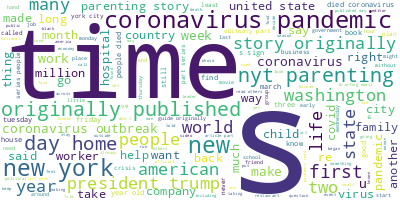

In [27]:
#to see if our data cleaning has been good, we will use wordcloud to do a quick visualization
from wordcloud import WordCloud

long_string = ','.join(list(lead_paragraphs_df['LeadParagraph_processed_04'].values))
#print(long_string)

wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

#END of data cleaning

In [28]:
#converting our dataframe "lead_paragraphs_df" into a list
lead_paragraphs_list = lead_paragraphs_df.LeadParagraph_processed_04.values.tolist()
type(lead_paragraphs_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


list

In [29]:
#converting our data into a dictionary of words
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lead_paragraphs_list)

print (data_words[0][0:20])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['washington', 'two', 'american', 'airstrikes', 'somalia', 'february', 'killed', 'two', 'civilian', 'injured', 'three', 'human', 'right', 'group', 'amnesty', 'international', 'alleged', 'new', 'report', 'united']


In [30]:
#to assign a number to each unique word in our dictionary and it's frequency, thus we get a tuple at this step.
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1)]


In [31]:
#taking one word(first column, first line, first word --> [0][:1][0]) out of the converted tuple to see what is it.
word = id2word[[0][:1][0]]
print (word)

acknowledged


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
#creating our model with the corpus and number of topics we need extracted
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
#model visualization
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20     0.497238 -0.093756       1        1  12.811874
26     0.431494  0.193291       2        1   8.148314
24    -0.459977  0.130825       3        1   7.704567
23    -0.423012 -0.132652       4        1   6.079576
18     0.108025 -0.442431       5        1   5.900978
17    -0.164227 -0.399087       6        1   5.375756
19    -0.301428 -0.276475       7        1   5.369728
1     -0.039877  0.422832       8        1   4.941992
14     0.093513  0.406570       9        1   4.082282
15     0.202232 -0.302631      10        1   3.748640
28     0.291444 -0.190633      11        1   3.627517
10    -0.141202  0.319162      12        1   3.530511
13     0.250342  0.213235      13        1   2.904590
3     -0.262618  0.257269      14        1   2.690584
8      0.123772  0.252150      15        1   2.443682
25    -0.114928  0.156896      16        1   2.076813
7     -0.236227 -0.014149      17        1   1.958720
2     -0.250638  0.109926      18        1   1.922622
21     0.258950  0.037160      19        1   1.908415
16    -0.049656 -0.267491      20        1   1.779068
6      0.211474 -0.074641      21        1   1.717988
11     0.023145  0.121930      22        1   1.506751
4      0.123052  0.093718      23        1   1.444943
5     -0.171292 -0.076803      24        1   1.398150
0      0.081845 -0.149032      25        1   1.325234
12    -0.010633 -0.161609      26        1   1.316631
22    -0.087794 -0.105692      27        1   1.217184
9      0.042869 -0.030548      28        1   0.681640
27    -0.022668  0.010860      29        1   0.348616
29    -0.003219 -0.008194      30        1   0.036634, topic_info=            Term         Freq        Total Category  logprob  loglift
83   coronavirus  2113.000000  2113.000000  Default  30.0000  30.0000
17           new  1409.000000  1409.000000  Default  29.0000  29.0000
117     pandemic  1120.000000  1120.000000  Default  28.0000  28.0000
226         year  1030.000000  1030.000000  Default  27.0000  27.0000
44        people   927.000000   927.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
24         state     0.002395   697.660934  Topic30  -9.7151  -4.6700
26     terrorist     0.002395    17.554570  Topic30  -9.7151  -0.9875
27         three     0.002395   360.963735  Topic30  -9.7151  -4.0110
28           two     0.002395   512.580387  Topic30  -9.7151  -4.3617
29        united     0.002395   255.047771  Topic30  -9.7151  -3.6637

[1053 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1085      9  0.984945       able
982      23  0.702849     abroad
642       6  0.977553  according
872       3  0.904671       acre
643      17  0.994347     across
...     ...       ...        ...
493       4  0.998344       york
348       8  0.991012        you
562      27  0.988652      young
514      28  0.907585    youtube
1154     13  0.970957       zoom

[706 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 27, 25, 24, 19, 18, 20, 2, 15, 16, 29, 11, 14, 4, 9, 26, 8, 3, 22, 17, 7, 12, 5, 6, 1, 13, 23, 10, 28, 30])

In [42]:
#END ~Written and Compiled by Akash Siva Kumar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
#reference
#https://github.com/Ali-Alameer/NLP/blob/main/week9_topic_modelling_LDA.ipynb
#How to Create an LDA Topic Model in Python with Gensim (Topic Modeling for DH 03.03), https://www.youtube.com/watch?v=TKjjlp5_r7o&t=1139s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
